In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/great_customers.csv')

In [3]:
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.00,9,Never-married,sales,not_caucasian,Male,0.0,0.0,40,399.0,NaN,0
1,1012811,25.0,private,76597.00,9,Divorced,sales,caucasian,Female,0.0,0.0,30,256.0,NaN,0
2,1006870,21.0,private,47947.25,10,Never-married,clerical,caucasian,Female,0.0,0.0,10,442.0,276.0,0
3,1022149,23.0,private,41740.25,7,Divorced,sales,caucasian,Female,0.0,0.0,20,NaN,NaN,0
4,1029558,26.0,private,NaN,9,Married,sales,not_caucasian,Male,NaN,0.0,36,NaN,120.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 13599 non-null  int64  
 1   age                     13178 non-null  float64
 2   workclass               13056 non-null  object 
 3   salary                  13177 non-null  float64
 4   education_rank          13599 non-null  int64  
 5   marital-status          13599 non-null  object 
 6   occupation              13056 non-null  object 
 7   race                    13599 non-null  object 
 8   sex                     13599 non-null  object 
 9   mins_beerdrinking_year  13175 non-null  float64
 10  mins_exercising_year    13178 non-null  float64
 11  works_hours             13599 non-null  int64  
 12  tea_per_year            11170 non-null  float64
 13  coffee_per_year         11188 non-null  float64
 14  great_customer_class    13599 non-null

In [9]:
features = df.columns
df.columns

Index(['user_id', 'age', 'workclass', 'salary', 'education_rank',
       'marital-status', 'occupation', 'race', 'sex', 'mins_beerdrinking_year',
       'mins_exercising_year', 'works_hours', 'tea_per_year',
       'coffee_per_year', 'great_customer_class'],
      dtype='object')

In [11]:
missing_data = df.isnull().sum()
missing_data

user_id                      0
age                        421
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

In [13]:
df['age'] = df['age'].fillna(df['age'].mean())


In [15]:
missing_data = df.isnull().sum()
missing_data

user_id                      0
age                          0
workclass                  543
salary                     422
education_rank               0
marital-status               0
occupation                 543
race                         0
sex                          0
mins_beerdrinking_year     424
mins_exercising_year       421
works_hours                  0
tea_per_year              2429
coffee_per_year           2411
great_customer_class         0
dtype: int64

<Axes: >

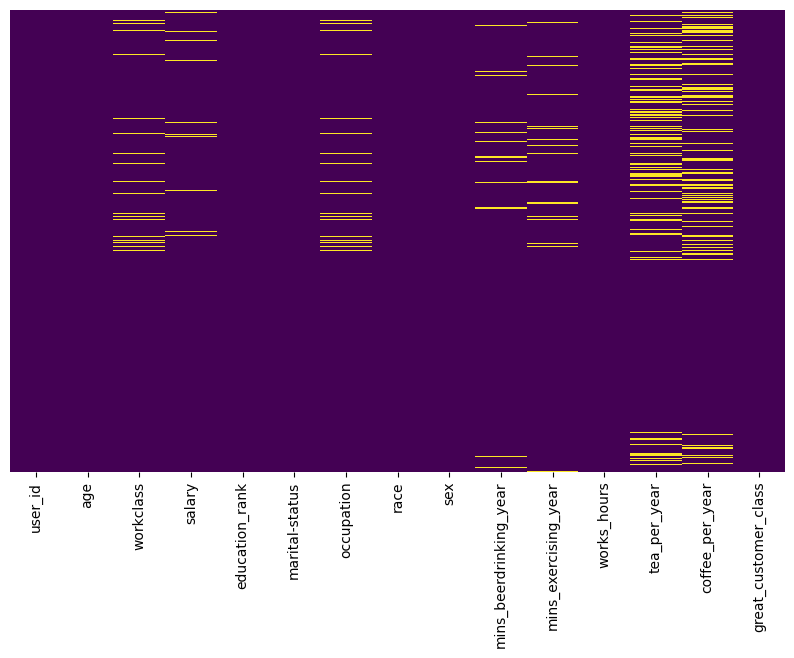

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [19]:

num_cols = ['mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year', 'coffee_per_year','salary']
cat_cols = ['workclass', 'occupation']


for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # mode() returns a Series, so [0] to get the first value


In [21]:
missing_data = df.isnull().sum()
missing_data

user_id                   0
age                       0
workclass                 0
salary                    0
education_rank            0
marital-status            0
occupation                0
race                      0
sex                       0
mins_beerdrinking_year    0
mins_exercising_year      0
works_hours               0
tea_per_year              0
coffee_per_year           0
great_customer_class      0
dtype: int64

<Axes: >

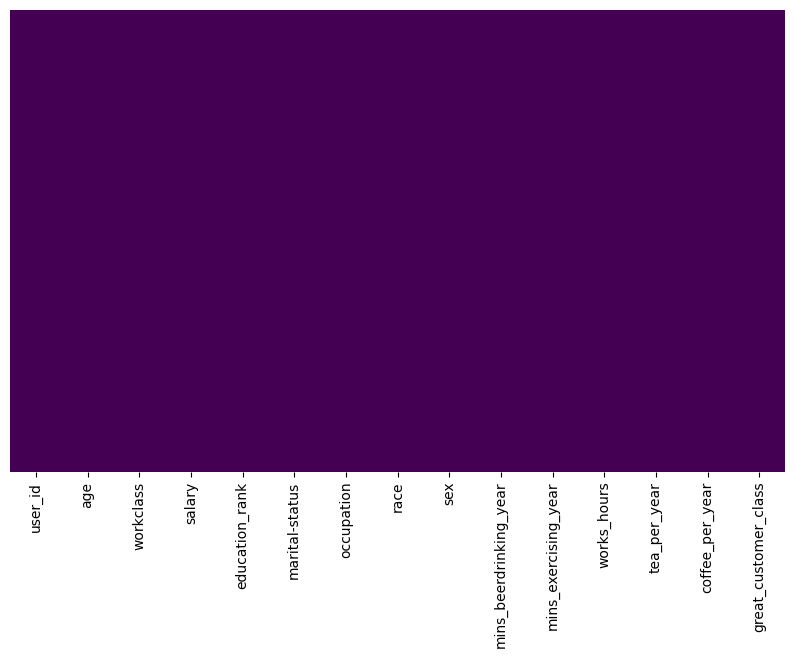

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [24]:
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,private,70773.000000,9,Never-married,sales,not_caucasian,Male,0.000000,0.0,40,399.000000,359.708169,0
1,1012811,25.0,private,76597.000000,9,Divorced,sales,caucasian,Female,0.000000,0.0,30,256.000000,359.708169,0
2,1006870,21.0,private,47947.250000,10,Never-married,clerical,caucasian,Female,0.000000,0.0,10,442.000000,276.000000,0
3,1022149,23.0,private,41740.250000,7,Divorced,sales,caucasian,Female,0.000000,0.0,20,217.276544,359.708169,0
4,1029558,26.0,private,37149.297355,9,Married,sales,not_caucasian,Male,447.920607,0.0,36,217.276544,120.000000,0


In [27]:
X = df.drop('great_customer_class', axis=1) 
y = df['great_customer_class']  

In [29]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])


In [31]:
df.head()

,user_id,age,workclass,salary,education_rank,marital-status,occupation,race,sex,mins_beerdrinking_year,mins_exercising_year,works_hours,tea_per_year,coffee_per_year,great_customer_class
0,1004889,14.0,1,70773.000000,9,2,9,1,1,0.000000,0.0,40,399.000000,359.708169,0
1,1012811,25.0,1,76597.000000,9,0,9,0,0,0.000000,0.0,30,256.000000,359.708169,0
2,1006870,21.0,1,47947.250000,10,2,1,0,0,0.000000,0.0,10,442.000000,276.000000,0
3,1022149,23.0,1,41740.250000,7,0,9,0,0,0.000000,0.0,20,217.276544,359.708169,0
4,1029558,26.0,1,37149.297355,9,1,9,1,1,447.920607,0.0,36,217.276544,120.000000,0


In [39]:
X = df.drop(columns=['great_customer_class', 'user_id'], axis=1)
y = df['great_customer_class']  

In [41]:
print(X.shape)
print(y.shape)

(13599, 13)
(13599,)


In [43]:
feature_name = X.columns.tolist()
feature_name

['age',
 'workclass',
 'salary',
 'education_rank',
 'marital-status',
 'occupation',
 'race',
 'sex',
 'mins_beerdrinking_year',
 'mins_exercising_year',
 'works_hours',
 'tea_per_year',
 'coffee_per_year']

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
feature_name = list(X.columns)
# no of maximum features we need to select
num_feats=8

In [47]:
def cor_selector(X, y,num_feats):
    # Your code goes here (Multiple lines)
    cor_list=[]
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    cor_support = [True if i in cor_feature else False for i in feature_name]
    # Your code ends here
    return cor_support, cor_feature

In [49]:
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

8 selected features


In [51]:
cor_feature

['education_rank',
 'salary',
 'coffee_per_year',
 'occupation',
 'mins_exercising_year',
 'works_hours',
 'workclass',
 'mins_beerdrinking_year']

In [53]:
def chi_squared_selector(X, y, num_feats):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    chi2_selector = SelectKBest(chi2, k=num_feats)
    X_new = chi2_selector.fit_transform(X_scaled, y)
    
    chi_support = chi2_selector.get_support()
    chi_feature = X.columns[chi_support].tolist()
    
    return chi_support, chi_feature

In [55]:
chi_support, chi_feature = chi_squared_selector(X, y,num_feats)
print(str(len(chi_feature)), 'selected features')

8 selected features


In [57]:
chi_feature

['workclass',
 'salary',
 'marital-status',
 'occupation',
 'sex',
 'mins_beerdrinking_year',
 'mins_exercising_year',
 'coffee_per_year']

In [59]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
def rfe_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = LogisticRegression()
    
    rfe = RFE(estimator=model, n_features_to_select=num_feats)
    rfe.fit(X_scaled, y)
    rfe_support = rfe.support_  
    rfe_feature = X.columns[rfe_support]

    # Your code ends here
    return rfe_support, rfe_feature
rfe_support, rfe_feature = rfe_selector(X, y,num_feats)
print(str(len(rfe_feature)), 'selected features')


8 selected features


In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [63]:
def embedded_rf_selector(X, y, num_feats):
    # Your code goes here (Multiple lines)
    rf = RandomForestClassifier(n_estimators=100)
    embedded_rf_selector = SelectFromModel(rf,max_features=num_feats)
    embedded_rf_selector = embedded_rf_selector.fit(X,y)
    embedded_rf_support = embedded_rf_selector.get_support()
    embedded_rf_feature = X.loc[:, embedded_rf_support].columns.tolist()
    # Your code ends here
    return embedded_rf_support, embedded_rf_feature

embedded_rf_support, embedded_rf_feature = embedded_rf_selector(X, y, num_feats)
print(str(len(embedded_rf_feature)), 'selected features')
embedded_rf_feature

7 selected features


['age',
 'salary',
 'education_rank',
 'marital-status',
 'mins_beerdrinking_year',
 'tea_per_year',
 'coffee_per_year']

In [65]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support,
                                    'Random Forest':embedded_rf_support})
# count the selected times for each feature
#feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)  

# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Random Forest,Total
1,mins_beerdrinking_year,True,True,True,True,4
2,coffee_per_year,True,True,True,True,4
3,workclass,True,True,True,False,3
4,salary,True,True,False,True,3
5,occupation,True,True,True,False,3
6,education_rank,True,False,True,True,3
7,works_hours,True,False,True,False,2
8,sex,False,True,True,False,2


In [67]:
X = df.drop(columns=['great_customer_class', 'age', 'mins_exercising_year', 'marital-status', 'race', 'tea_per_year'])
y = df['great_customer_class']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', probability=True, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Bernoulli Naive Bayes': BernoulliNB(),
    }
    
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Random Forest Accuracy: 0.9243
SVM Accuracy: 0.9239
Logistic Regression Accuracy: 0.9228
Naive Bayes Accuracy: 0.9107
KNN Accuracy: 0.9151
Bernoulli Naive Bayes Accuracy: 0.8816


In [77]:
ensemble = VotingClassifier(
        estimators=[('rf', models['Random Forest']),
                    ('svm', models['SVM']),
                    ('lr', models['Logistic Regression']),
                    ('knn', models['KNN']),
                    ('bnb', models['Bernoulli Naive Bayes'])], voting='soft')
# Fit the ensemble model
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Voting Model Accuracy: {ensemble_acc:.4f}")

estimator_list = [
        ('rf', models['Random Forest']),
        ('svm', models['SVM']),
        ('lr', models['Logistic Regression']),
        ('knn', models['KNN']),
        ('bnb', models['Bernoulli Naive Bayes'])
    ]
    
# Define the stacking model with Logistic Regression as the final estimator
stack_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())    
# Fit the stacking model
stack_model.fit(X_train, y_train)
# Make predictions and evaluate accuracy
y_pred = stack_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Ensemble stack Model Accuracy: {acc:.4f}")

Ensemble Voting Model Accuracy: 0.9250
Ensemble stack Model Accuracy: 0.9254


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Define dataset path
dataset_path = "great_customers.csv"

# Data Loader
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Data Cleaning and Encoding
def clean_and_encode_data(df):
    num_cols = ['mins_beerdrinking_year', 'mins_exercising_year', 'tea_per_year', 'coffee_per_year', 'salary', 'age']
    cat_cols = ['workclass', 'occupation']

    # Fill missing values for numeric columns with mean
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())

    # Fill missing values for categorical columns with mode
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Apply Label Encoding to categorical features
    label_encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le  # Store encoders for inverse transformation if needed

    return df, label_encoders

# Feature Selection
def select_features(df):
    df = df.drop(columns=['user_id'])  # Drop irrelevant column
    X = df.drop(columns=['great_customer_class', 'age', 'education_rank', 'marital-status', 'race', 'sex', 'tea_per_year'])
    y = df['great_customer_class']

    return X, y

# Model Training and Evaluation
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardizing the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', probability=True, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Bernoulli Naive Bayes': BernoulliNB(),
    }
    
    accuracies = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[name] = acc
        print(f"{name} Accuracy: {acc:.4f}")
    
    return accuracies, X_train, y_train, X_test, y_test, models

# Ensemble Learning
def ensemble_learning(models, X_train, y_train, X_test, y_test):
    # Define the ensemble VotingClassifier
    ensemble = VotingClassifier(
        estimators=[('rf', models['Random Forest']),
                    ('svm', models['SVM']),
                    ('lr', models['Logistic Regression']),
                    ('knn', models['KNN']),
                    ('bnb', models['Bernoulli Naive Bayes'])], voting='soft')

    # Define the estimator list for StackingClassifier
    estimator_list = [
        ('rf', models['Random Forest']),
        ('svm', models['SVM']),
        ('lr', models['Logistic Regression']),
        ('knn', models['KNN']),
        ('bnb', models['Bernoulli Naive Bayes'])
    ]
    
    # Define the stacking model with Logistic Regression as the final estimator
    stack_model = StackingClassifier(estimators=estimator_list, final_estimator=LogisticRegression())
    
    # Fit the stacking model
    stack_model.fit(X_train, y_train)
    
    # Make predictions and evaluate accuracy
    y_pred = stack_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Ensemble Stacking Model Accuracy: {acc:.4f}")
    
    # Fit the ensemble model
    ensemble.fit(X_train, y_train)
    y_pred_ensemble = ensemble.predict(X_test)
    ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
    print(f"Ensemble Voting Model Accuracy: {ensemble_acc:.4f}")
    
    return acc, ensemble_acc

# Main Execution
if __name__ == "__main__":
    df = load_data(dataset_path)
    df, label_encoders = clean_and_encode_data(df)  # Now using Label Encoding
    X, y = select_features(df)
    accuracies, X_train, y_train, X_test, y_test, models = train_and_evaluate(X, y)
    stacking_acc, voting_acc = ensemble_learning(models, X_train, y_train, X_test, y_test)


Random Forest Accuracy: 0.9169
SVM Accuracy: 0.9235
Logistic Regression Accuracy: 0.9202
Naive Bayes Accuracy: 0.9026
KNN Accuracy: 0.9136
Bernoulli Naive Bayes Accuracy: 0.9011
Ensemble Stacking Model Accuracy: 0.9254
Ensemble Voting Model Accuracy: 0.9246
